In [ ]:
# Install RDKit and pubchempy using conda
!conda install -c conda-forge rdkit pubchempy

# Install pandas for data handling
!pip install pandas

!pip install pubchempy

/bin/bash: line 1: conda: command not found


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('solubility.csv')

# Display the first few rows of the dataframe
print(df.head())


  Compound ID  Minimum Degree  Molecular Weight  Number of H-Bond Donors  \
0   Amigdalin               1           457.432                        7   
1    Fenfuram               1           201.225                        1   
2      citral               1           152.237                        0   
3      Picene               2           278.354                        0   
4   Thiophene               2            84.143                        0   

   Number of Rings  Number of Rotatable Bonds  Polar Surface Area  \
0                3                          7              202.32   
1                2                          2               42.24   
2                0                          4               17.07   
3                5                          0                0.00   
4                1                          0                0.00   

   measured log solubility in mols per litre  \
0                                      -0.77   
1                               

**Molecular information**

In [ ]:
!pip install rdkit-pypi

In [ ]:
def fetch_smiles(compound_name):
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{compound_name}/property/CanonicalSMILES/JSON'
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses
        data = response.json()
        if 'PropertyTable' in data and 'Properties' in data['PropertyTable']:
            return data['PropertyTable']['Properties'][0]['CanonicalSMILES']
        else:
            print(f'No SMILES data found for {compound_name}')
    except requests.exceptions.RequestException as e:
        print(f'Error fetching SMILES for {compound_name}: {e}')
    return None

# List of compounds to process
compounds = ['propane', 'ethene', 'cyclohexane', 'buckminsterfullerene']

# Fetch SMILES and create RDKit molecules
molecule_dict = {}
for compound in compounds:
    smiles = fetch_smiles(compound)
    if smiles:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            molecule_dict[compound] = mol
            print(f'{compound}: {smiles}')
        else:
            print(f'Error converting SMILES to molecule for {compound}')
    else:
        print(f'Error fetching SMILES for {compound}')

# Example usage of RDKit molecules
for name, mol in molecule_dict.items():
    if mol:
        print(f'\n{name} molecule object:')
        print(Chem.MolToMolBlock(mol))  # Print the molecular structure in SD format


propane: CCC
ethene: C=C
cyclohexane: C1CCCCC1
buckminsterfullerene: C12=C3C4=C5C6=C1C7=C8C9=C1C%10=C%11C(=C29)C3=C2C3=C4C4=C5C5=C9C6=C7C6=C7C8=C1C1=C8C%10=C%10C%11=C2C2=C3C3=C4C4=C5C5=C%11C%12=C(C6=C95)C7=C1C1=C%12C5=C%11C4=C3C3=C5C(=C81)C%10=C23

propane molecule object:

     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END


ethene molecule object:

     RDKit          2D

  2  1  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
M  END


cyclohexane molecule object:

     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
 

In [ ]:
!pip install rdkit-pypi --upgrade

In [ ]:
for name, mol in molecule_dict.items():
    if mol:
        print(f'\n{name} molecule object:')
        print(f"Number of atoms: {mol.GetNumAtoms()}")
        print("Chemical symbols and atomic weights:")
        for atom in mol.GetAtoms():
          print(f"  - Symbol: {atom.GetSymbol()}, Atomic weight: {atom.GetMass()}")
        # Use GetAromaticAtoms() and count the number of atoms instead of GetNumAromaticBonds()
        num_aromatic_atoms = len([atom for atom in mol.GetAtoms() if atom.GetIsAromatic()])
        print(f"Number of aromatic atoms: {num_aromatic_atoms}")


propane molecule object:
Number of atoms: 3
Chemical symbols and atomic weights:
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
Number of aromatic atoms: 0

ethene molecule object:
Number of atoms: 2
Chemical symbols and atomic weights:
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
Number of aromatic atoms: 0

cyclohexane molecule object:
Number of atoms: 6
Chemical symbols and atomic weights:
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
Number of aromatic atoms: 0

buckminsterfullerene molecule object:
Number of atoms: 60
Chemical symbols and atomic weights:
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, Atomic weight: 12.011
  - Symbol: C, A

**Drawing molecules**

Error fetching SMILES for Amigdalin: 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/Amigdalin/property/CanonicalSMILES/JSON


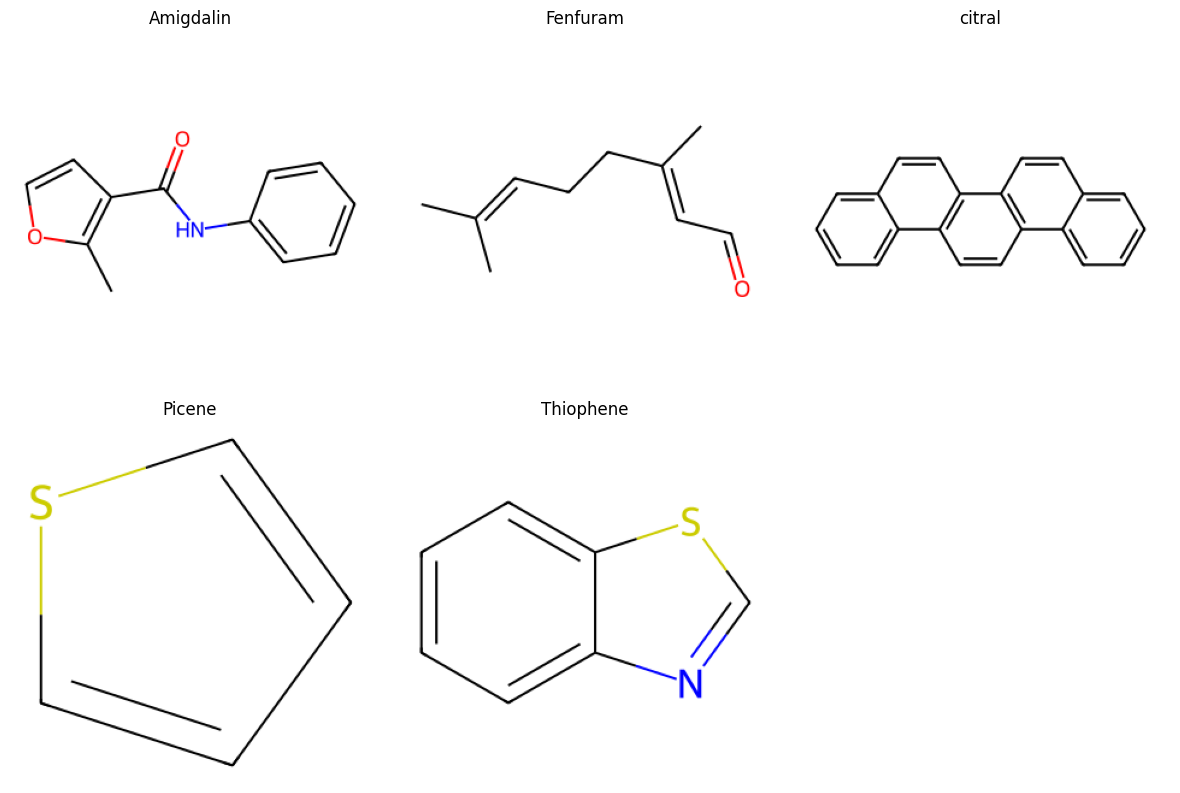

In [ ]:
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# Fetch SMILES for the first six compounds
smiles_list = []
for compound in df['Compound ID'][:6]:
    smiles = fetch_smiles(compound)
    if smiles:
        smiles_list.append(smiles)

# Generate RDKit molecules
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Create a grid layout
n_cols = 3
n_rows = (len(mols) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

# Draw molecules with labels
for i, mol in enumerate(mols):
    row = i // n_cols
    col = i % n_cols
    if mol:
        img = Draw.MolToImage(mol)
        axs[row, col].imshow(img)
        axs[row, col].set_title(df['Compound ID'][i])
        axs[row, col].axis('off')

# Hide any unused subplots
for i in range(len(mols), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


**Challenges Encountered**

1.Fetching SMILES Strings:

Errors occurred when trying to get SMILES strings for compounds. There was a problem with the request sent to the database and I kept on getting errors everytime I tried to run the code to get the SMILES strings.

Possible Reason: The request was not be properly formatted.

2.Creating Molecules:

Converting SMILES strings into molecular models kept on failing because the SMILES string were not valid.

Possible Reasons:The SMILES string might be malformed or the conversion tool might not handle it correctly